##参考
[networkx - 点の位置を指定して、グラフを見やすく表示する方法について](http://pynote.hatenablog.com/entry/networkx-draw-graph-with-graphviz)

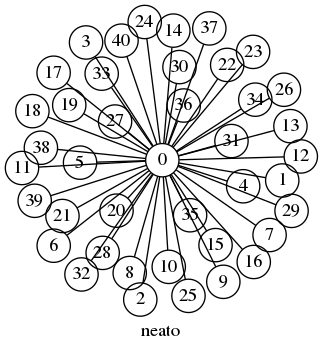

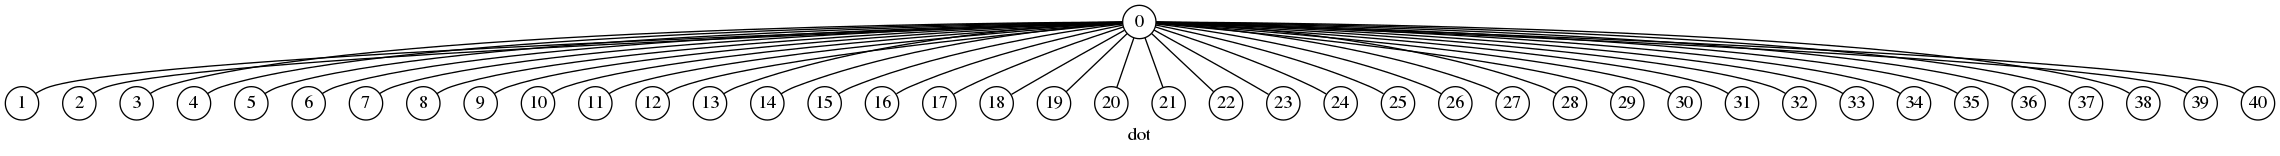

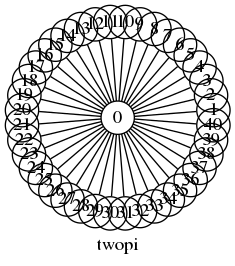

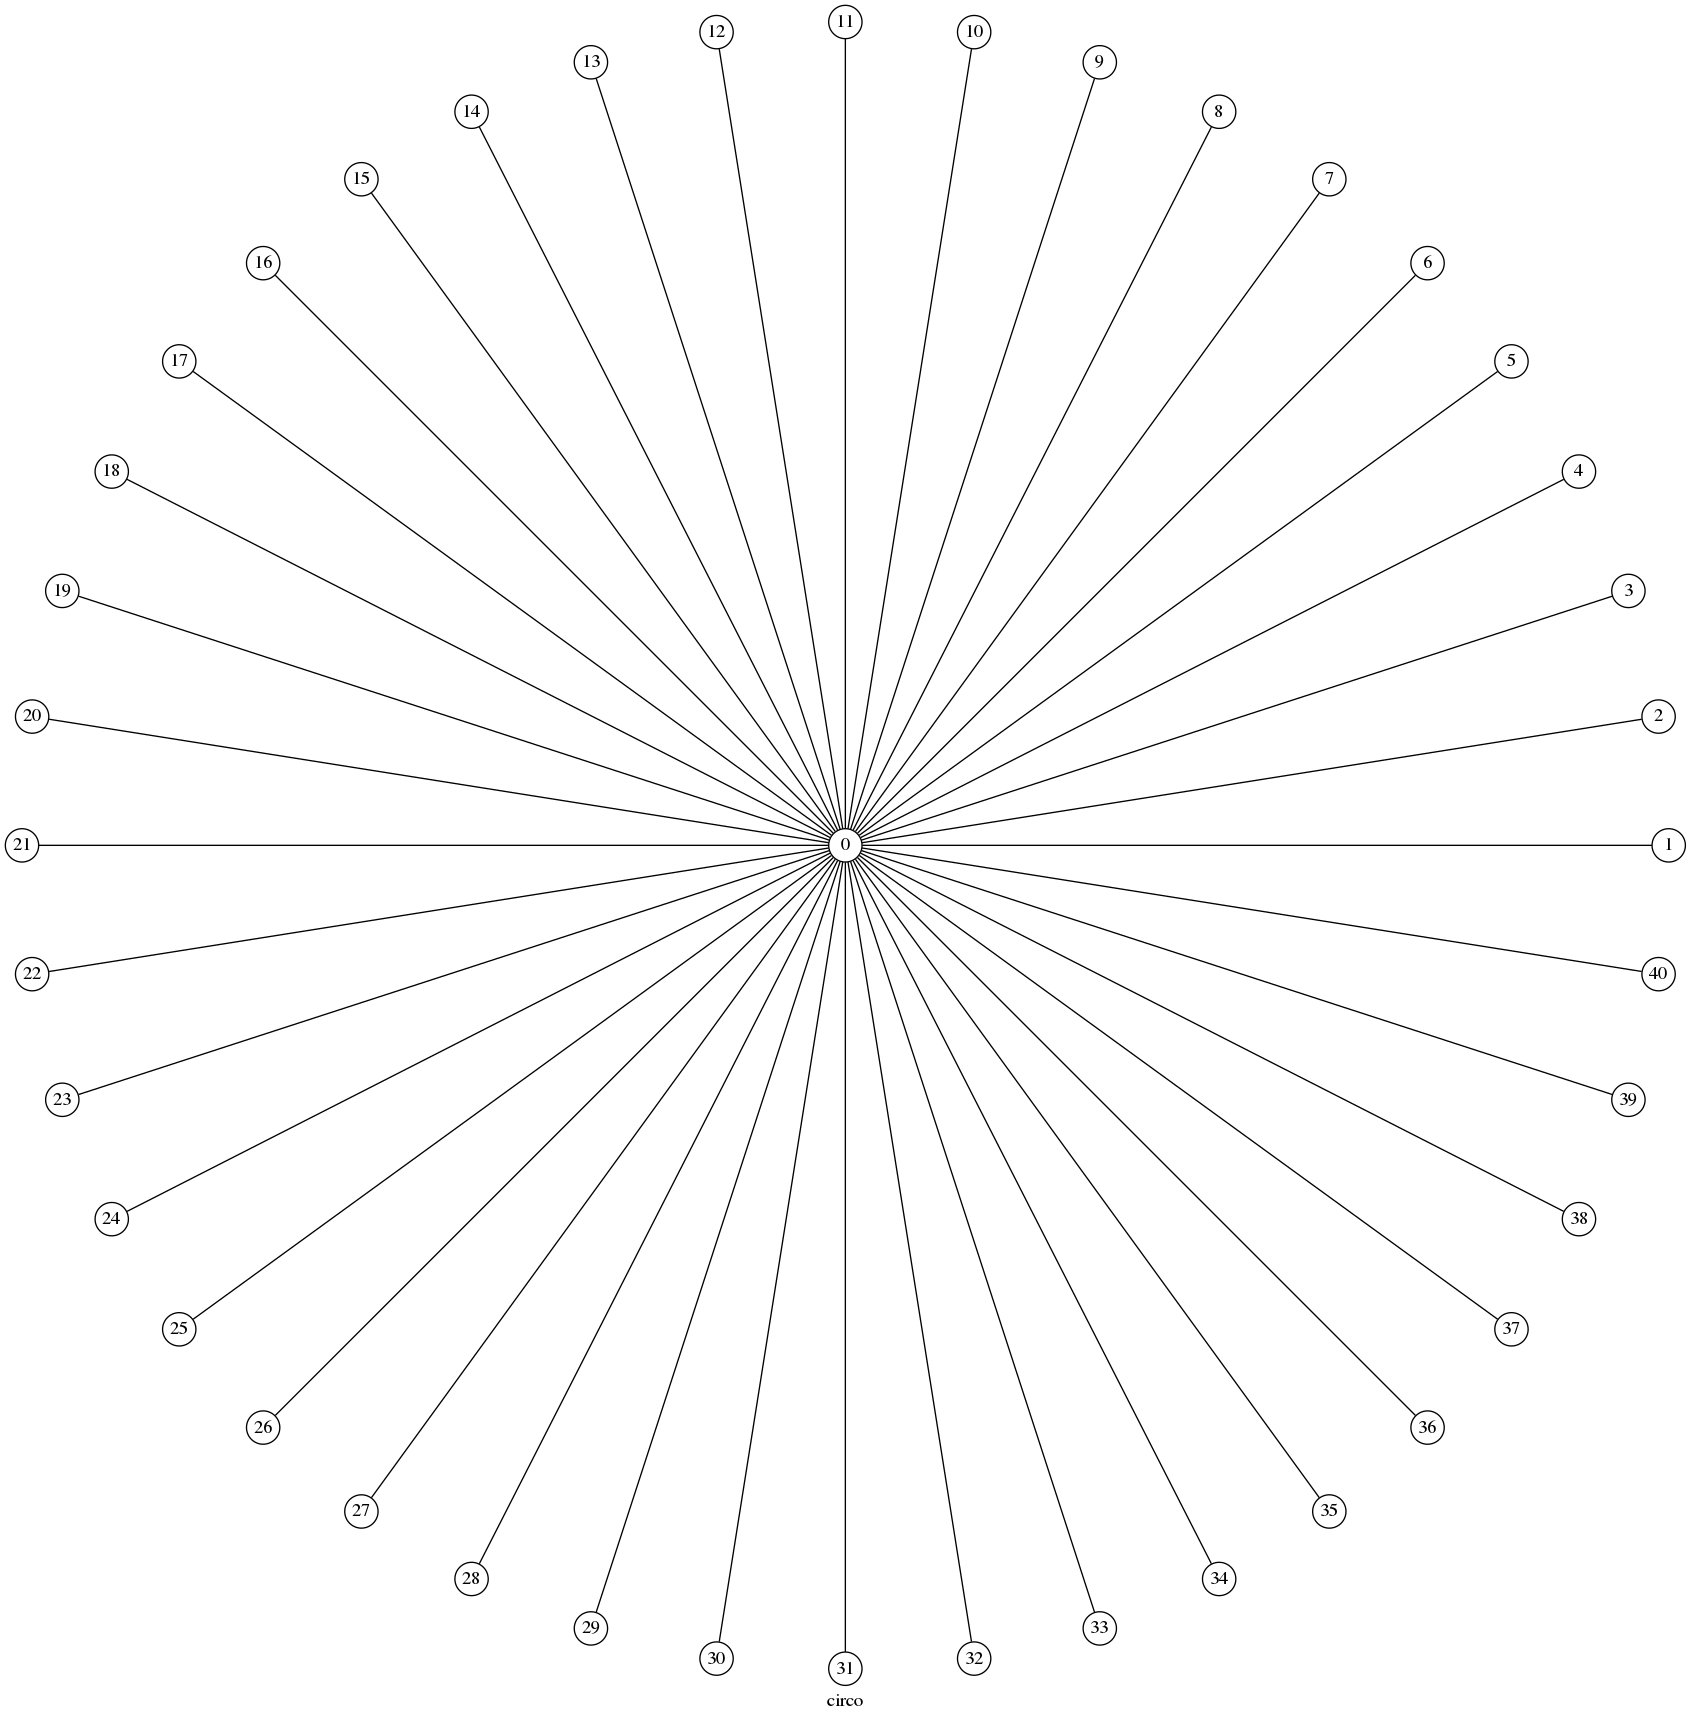

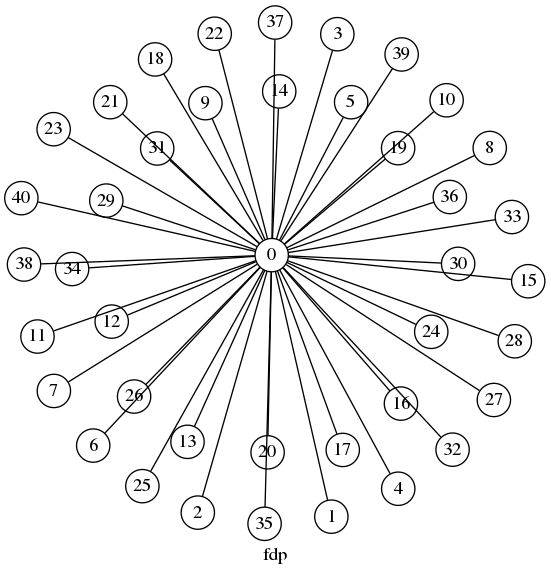

In [6]:
import networkx as nx
from IPython.display import Image, display

# グラフを作成する。
G = nx.star_graph(40)

# 各レイアウト方法で描画する。
progs = ['neato', 'dot', 'twopi', 'circo', 'fdp']
for p in progs:
    A = nx.nx_agraph.to_agraph(G)  # AGraph に変換する。
    A.node_attr.update(fixedsize=True, width=0.35, height=0.35)  # 点の大きさを固定する。
    A.graph_attr.update(abelloc='b', label=p)  # タイトルをつける。
    
    png = A.draw(format='png', prog=p)
    display(Image(png))

In [8]:
import networkx as nx
from IPython.display import Image, display


def draw_graph(G, pos, **kwargs):
    '''グラフを描画する。
    Args:
        G: グラフ
        pos: {点: (x, y), 点: (x, y), ...} である dict。
    '''
    A = nx.nx_agraph.to_agraph(G)
    # 点の大きさを固定する。
    A.node_attr.update(fixedsize=True, width=0.35, height=0.35, **kwargs)
    # 点の位置を設定する。
    for n, (x, y) in pos.items():
        A.add_node(n, pos='{},{}!'.format(x, y))
    # グラフを描画する。
    png = A.draw(format='png', prog='neato')
    display(Image(png))

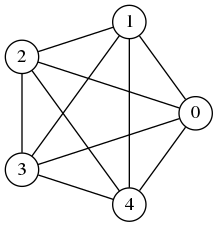

In [10]:
# 完全グラフ
G = nx.complete_graph(5)
pos = nx.circular_layout(G)
draw_graph(G, pos)

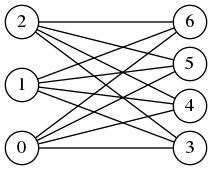

In [12]:
# ２部グラフ
G = nx.complete_bipartite_graph(3, 4)
g1, g2 = nx.bipartite.sets(G)
pos = nx.bipartite_layout(G, g1, align='vertical')
draw_graph(G, pos)

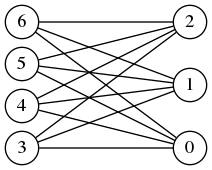

In [13]:
G = nx.complete_bipartite_graph(3, 4)
g1, g2 = nx.bipartite.sets(G)
pos = nx.bipartite_layout(G, g2, align='vertical')
draw_graph(G, pos)

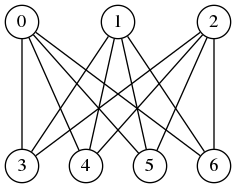

In [14]:
G = nx.complete_bipartite_graph(3, 4)
g1, g2 = nx.bipartite.sets(G)
pos = nx.bipartite_layout(G, g1, align='horizontal')
draw_graph(G, pos)

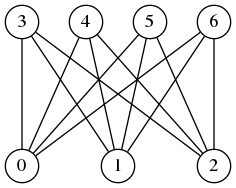

In [15]:
G = nx.complete_bipartite_graph(3, 4)
g1, g2 = nx.bipartite.sets(G)
pos = nx.bipartite_layout(G, g2, align='horizontal')
draw_graph(G, pos)

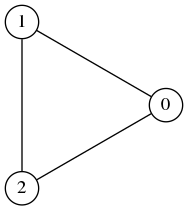

In [17]:
# 回路
G = nx.cycle_graph(3)
pos = nx.circular_layout(G)
draw_graph(G, pos)

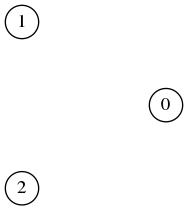

In [18]:
# 空グラフ
G = nx.empty_graph(3)
pos = nx.circular_layout(G)
draw_graph(G, pos)

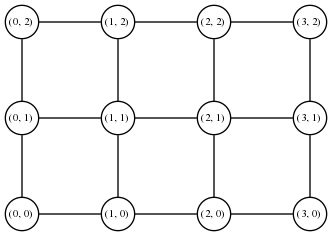

In [21]:
# 2次元グリッド
def grid_2d_layout(G):
    return {n: n for n in G.nodes}

G = nx.grid_2d_graph(4, 3)
pos = grid_2d_layout(G)
draw_graph(G, pos, fontsize=8)